# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

tf.random.set_seed(seed=42)

# Define Function

I defined this function to allow me to plot the loss and accuracy across multiple Neural Networks models.

The purpose of this is since I will be using multiple times, I will define a function.

In [2]:
def plotting(df:pd.DataFrame, temp_list:list):

  ax = plt.subplots(1,1)

  # Plotting multiple lines on 1 figure
  sns.lineplot(data=df, x=df.index, y=temp_list[0], label= 'train_' + temp_list[0])
  sns.lineplot(data=df, x=df.index, y=temp_list[1], label= temp_list[1])

  # Setting labels for axis
  plt.xlabel(xlabel='epoch (s)', fontsize=12);
  plt.ylabel(ylabel= temp_list[0], fontsize=12)

  # Set title
  plt.title(label= temp_list[0] + ' vs epochs', fontsize=16);

### Define ROC AUC Function

In [3]:
def plot_roc(predictions_probability, test):

  no_skill_probability = [0 for _ in range(len(test))]
  no_skill_auc = roc_auc_score(test, no_skill_probability)
  no_skill_fpr, no_skill_tpr, _ = roc_curve(test, no_skill_probability)

  model_auc = roc_auc_score(test, predictions_probability)
  model_fpr, model_tpr, _ = roc_curve(test, predictions_probability)

  print(f'No Skill: {no_skill_auc}')
  print(f'Model: {model_auc}')

  plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
  plt.plot(model_fpr, model_tpr, linestyle='dotted', label='Model')

# Data

In [4]:
IDG = ImageDataGenerator(rescale=(1/255))

train = IDG.flow_from_directory(directory='./Data/train',
                                target_size=(50,50),
                                color_mode='rgb',
                                class_mode='binary',
                                batch_size=32,
                                shuffle=True,
                                seed=42)

val = IDG.flow_from_directory(directory='./Data/val',
                                target_size=(50,50),
                                color_mode='rgb',
                                class_mode='binary',
                                batch_size=32,
                                shuffle=True,
                                seed=42)

Found 1717 images belonging to 2 classes.
Found 431 images belonging to 2 classes.


In [5]:
train.class_indices

{'Kirmizi_Pistachio': 0, 'Siirt_Pistachio': 1}

In [6]:
val.class_indices

{'Kirmizi_Pistachio': 0, 'Siirt_Pistachio': 1}

### Summary

*   Kirmizi Pistachios will be labelled 0 while Siirt will be given the value 1

# Compute Class Weight

In [7]:
np.unique(train.classes)

array([0, 1])

In [8]:
class_weights = {}

for i,j in zip(np.unique(train.classes), class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(train.classes),y=train.classes)):
  class_weights[i] = j

class_weights

{0: 0.8715736040609137, 1: 1.1728142076502732}

# Model Building - Part 1

I am altering different aspects of a CNN to maximise accuracy.

The first model will be V1, second V2 so on and so forth.

## V1

In [9]:
model = Sequential()

# Convolutional Layer
model.add(layer=Conv2D(filters=32, kernel_size=(4,4), input_shape=(50,50,3), activation='relu'))
model.add(layer=MaxPool2D(pool_size=(2,2)))

model.add(layer=Flatten())
model.add(layer=Dense(units=256, activation='relu'))

# Output layer
model.add(layer=Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 256)               4333824   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 4335649 (16.54 MB)
Trainable params: 4335649 (16.54 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [11]:
model.fit(x=train,
          epochs=10,
          validation_data=val,
          class_weight=class_weights)

Epoch 1/10


13/54 [======>.......................] - ETA: 2s - loss: 0.9029 - accuracy: 0.4963

54/54 [==============================] - 5s 69ms/step - loss: 0.5691 - accuracy: 0.7210 - val_loss: 0.4106 - val_accuracy: 0.8005
Epoch 2/10
54/54 [==============================] - 4s 67ms/step - loss: 0.3594 - accuracy: 0.8515 - val_loss: 0.3653 - val_accuracy: 0.8283
Epoch 3/10
54/54 [==============================] - 4s 69ms/step - loss: 0.3202 - accuracy: 0.8602 - val_loss: 0.3650 - val_accuracy: 0.8492
Epoch 4/10
54/54 [==============================] - 4s 67ms/step - loss: 0.2841 - accuracy: 0.8806 - val_loss: 0.3270 - val_accuracy: 0.8608
Epoch 5/10
54/54 [==============================] - 4s 67ms/step - loss: 0.2751 - accuracy: 0.8818 - val_loss: 0.3334 - val_accuracy: 0.8631
Epoch 6/10
54/54 [==============================] - 4s 68ms/step - loss: 0.2507 - accuracy: 0.8998 - val_loss: 0.3590 - val_accuracy: 0.8492
Epoch 7/10
54/54 [==============================] - 4s 65ms/step - loss: 0.2214 - accuracy: 0.9068 - val_loss: 0.3591 - val_accuracy: 0.8469
Epoch 8/10
54/54 [======

### Model Evaluation

In [12]:
metrics_V1 = pd.DataFrame(model.history.history)
metrics_V1.to_csv('./Data/Models/CNN_metrics_V1.csv')
metrics_V1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.569081,0.721025,0.410600,0.800464
1,0.359420,0.851485,0.365309,0.828306
2,0.320194,0.860221,0.364965,0.849188
3,0.284107,0.880606,0.326951,0.860789
4,0.275113,0.881771,0.333411,0.863109


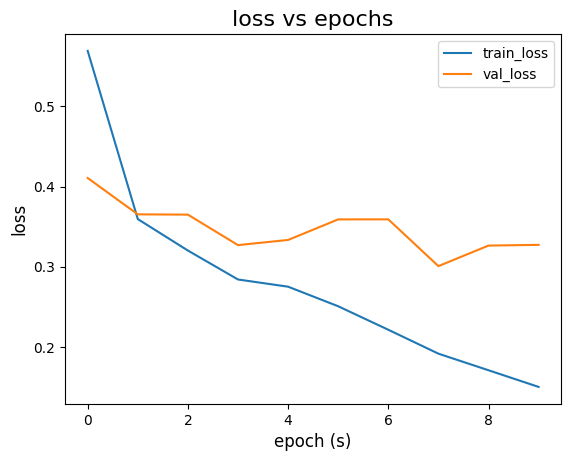

In [13]:
plotting(df=metrics_V1, temp_list=['loss', 'val_loss'])

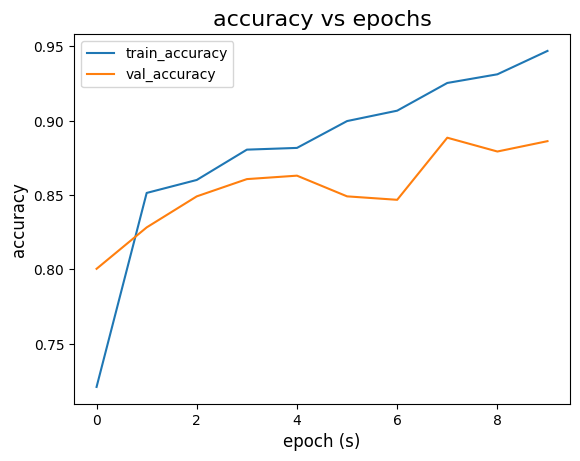

In [14]:
plotting(df=metrics_V1, temp_list=['accuracy', 'val_accuracy'])

### Summary

*   From the loss graph, the validation loss starts to increase after 7 epochs

*   The accuracy for validation seems to be up and down, there is no clear trend

*   I will add early stopping and dropout layer to the next CNN models, in isolation, to improve loss on validation

In [15]:
predictions_proba = model.predict(val)

 5/14 [=========>....................] - ETA: 0s

14/14 [==============================] - 1s 42ms/step


In [16]:
predictions_proba.shape

(431, 1)

In [17]:
predictions_proba[:5]

array([[9.9610555e-01],
       [1.4198098e-02],
       [5.7066098e-04],
       [4.1041244e-02],
       [1.8756586e-03]], dtype=float32)

In [18]:
predictions = predictions_proba > 0.5
predictions[:5]

array([[ True],
       [False],
       [False],
       [False],
       [False]])

In [19]:
val.classes[:5]

array([0, 0, 0, 0, 0])

### Classification Report / Confusion Matrix

In [20]:
print(classification_report(y_true = val.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       247
           1       0.38      0.32      0.35       184

    accuracy                           0.48       431
   macro avg       0.46      0.46      0.46       431
weighted avg       0.47      0.48      0.48       431



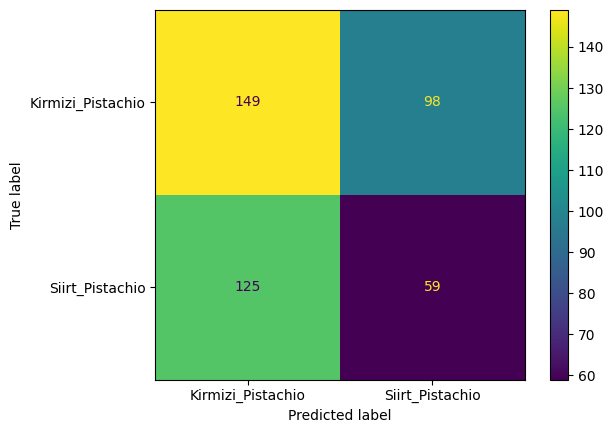

In [21]:
cm = confusion_matrix(y_true=val.classes, y_pred=predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train.class_indices.keys()).plot()
plt.show()

### ROC Curve / AUC

No Skill: 0.5
Model: 0.4419116352754796


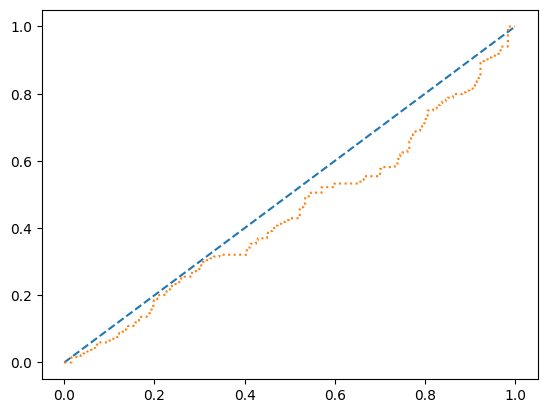

In [22]:
plot_roc(predictions_probability=predictions_proba, test=val.classes)

### Summary

*   From the confusion matrix the majority of misclassified images are Kirmizi predicted as Siirt Pistachios

*   From the ROC Curve, it the model is doing marginally lousier than a prediction that is based on random classification


### Save model

In [23]:
model.save(filepath='./Data/Models/CNN_V1.keras')

## V2

In this model, I will introduce early stopping to observe the performance

In [24]:
model = Sequential()

# Convolutional Layer
model.add(layer=Conv2D(filters=32, kernel_size=(4,4), input_shape=(50,50,3), activation='relu'))
model.add(layer=MaxPool2D(pool_size=(2,2)))

model.add(layer=Flatten())
model.add(layer=Dense(units=256, activation='relu'))

# Output layer
model.add(layer=Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [26]:
model.fit(x=train,
          epochs=10,
          validation_data=val,
          class_weight=class_weights,
          callbacks=[early_stop],
          )

Epoch 1/10
10/54 [====>.........................] - ETA: 2s - loss: 0.9976 - accuracy: 0.5375

54/54 [==============================] - 5s 72ms/step - loss: 0.5599 - accuracy: 0.7496 - val_loss: 0.4027 - val_accuracy: 0.8028
Epoch 2/10
54/54 [==============================] - 4s 66ms/step - loss: 0.3613 - accuracy: 0.8416 - val_loss: 0.3803 - val_accuracy: 0.8121
Epoch 3/10
54/54 [==============================] - 4s 68ms/step - loss: 0.3262 - accuracy: 0.8573 - val_loss: 0.3855 - val_accuracy: 0.8190
Epoch 4/10
54/54 [==============================] - 4s 67ms/step - loss: 0.3038 - accuracy: 0.8666 - val_loss: 0.3731 - val_accuracy: 0.8306
Epoch 5/10
54/54 [==============================] - 4s 67ms/step - loss: 0.2775 - accuracy: 0.8777 - val_loss: 0.3500 - val_accuracy: 0.8677
Epoch 6/10
54/54 [==============================] - 4s 69ms/step - loss: 0.2546 - accuracy: 0.8987 - val_loss: 0.3582 - val_accuracy: 0.8538
Epoch 7/10
54/54 [==============================] - 4s 67ms/step - loss: 0.2296 - accuracy: 0.9045 - val_loss: 0.3314 - val_accuracy: 0.8654
Epoch 8/10
54/54 [======

### Model Evaluation

In [27]:
metrics_V2 = pd.DataFrame(model.history.history)
metrics_V2.to_csv('./Data/Models/CNN_metrics_V2.csv')
metrics_V2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.559904,0.749563,0.402657,0.802784
1,0.361344,0.841584,0.380269,0.812065
2,0.326188,0.857309,0.385544,0.819026
3,0.303807,0.866628,0.373145,0.830626
4,0.277527,0.877694,0.350038,0.867749


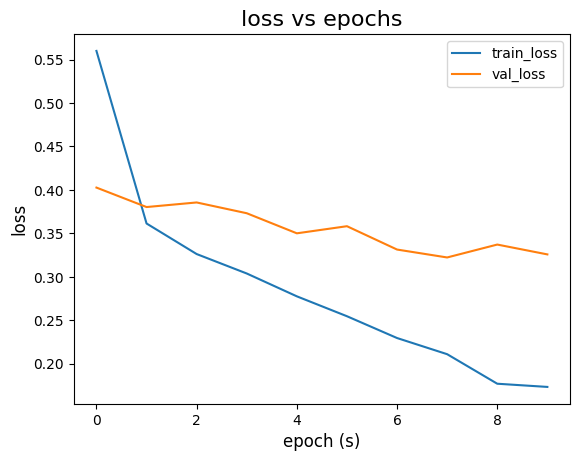

In [28]:
plotting(df=metrics_V2, temp_list=['loss', 'val_loss'])

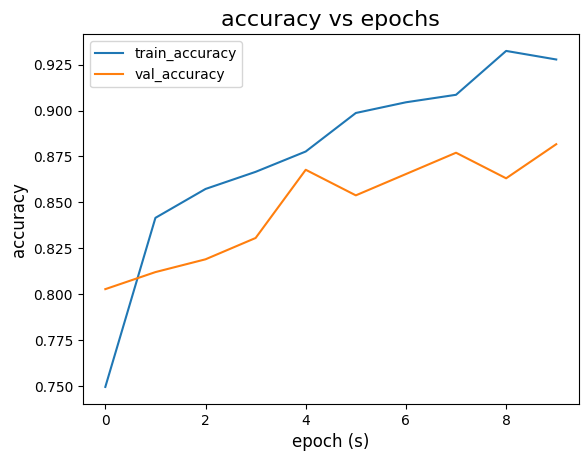

In [29]:
plotting(df=metrics_V2, temp_list=['accuracy', 'val_accuracy'])

### Summary

*   Early stopping offers no advantage in terms of loss and accuracy

*   Validation's loss and accuracy shows no clear trend when plotted against number of epochs

In [30]:
predictions_proba = model.predict(val)

14/14 [==============================] - 1s 41ms/step


In [31]:
predictions_proba.shape

(431, 1)

In [32]:
predictions_proba[:5]

array([[9.7607511e-01],
       [4.5505699e-02],
       [8.8096231e-01],
       [1.4314656e-02],
       [1.4853720e-04]], dtype=float32)

In [33]:
predictions = predictions_proba > 0.5
predictions[:5]

array([[ True],
       [False],
       [ True],
       [False],
       [False]])

In [34]:
val.classes[:5]

array([0, 0, 0, 0, 0])

### Classification Report / Confusion Matrix

In [35]:
print(classification_report(y_true = val.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       247
           1       0.40      0.41      0.40       184

    accuracy                           0.49       431
   macro avg       0.48      0.48      0.48       431
weighted avg       0.49      0.49      0.49       431



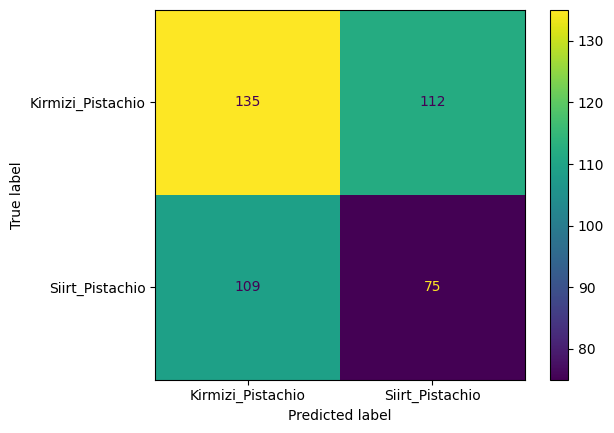

In [36]:
cm = confusion_matrix(y_true=val.classes, y_pred=predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train.class_indices.keys()).plot()
plt.show()

### ROC Curve / AUC

No Skill: 0.5
Model: 0.48389368069001937


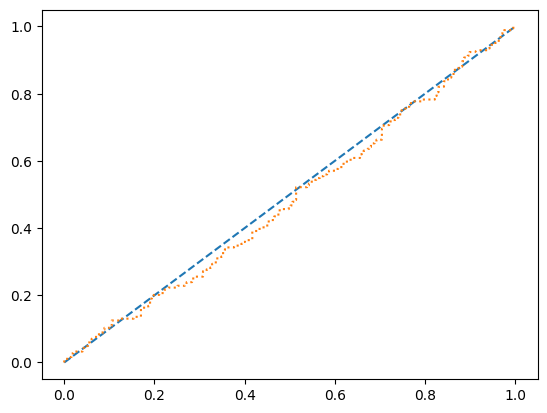

In [37]:
plot_roc(predictions_probability=predictions_proba, test=val.classes)

### Summary

*   The same pattern can be gleaned from classification report, Kirmizi Pistachios classified wrongly as Siirt make up the majority

*   Based on ROC, this model offers a slight improvement from Model V1

### Save model

In [38]:
model.save(filepath='./Data/Models/CNN_V2.keras')

## V3

In this model, I will hold everything constant and introduce dropout layer to observe the performance

In [39]:
model = Sequential()

# Convolutional Layer
model.add(layer=Conv2D(filters=32, kernel_size=(4,4), input_shape=(50,50,3), activation='relu'))
model.add(layer=MaxPool2D(pool_size=(2,2)))

model.add(layer=Flatten())
model.add(layer=Dense(units=256, activation='relu'))

# Adding in a dropout layer to prevent overfitting
model.add(Dropout(rate=0.5))

# Output layer
model.add(layer=Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 47, 47, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 16928)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4333824   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                      

In [41]:
model.fit(x=train,
          epochs=10,
          validation_data=val,
          class_weight=class_weights,
          )

Epoch 1/10


54/54 [==============================] - 5s 73ms/step - loss: 0.4716 - accuracy: 0.7729 - val_loss: 0.4030 - val_accuracy: 0.8051
Epoch 2/10
54/54 [==============================] - 4s 68ms/step - loss: 0.3478 - accuracy: 0.8486 - val_loss: 0.3651 - val_accuracy: 0.8399
Epoch 3/10
54/54 [==============================] - 4s 67ms/step - loss: 0.3165 - accuracy: 0.8666 - val_loss: 0.3647 - val_accuracy: 0.8445
Epoch 4/10
54/54 [==============================] - 4s 66ms/step - loss: 0.2885 - accuracy: 0.8754 - val_loss: 0.3447 - val_accuracy: 0.8492
Epoch 5/10
54/54 [==============================] - 4s 69ms/step - loss: 0.2679 - accuracy: 0.8911 - val_loss: 0.3324 - val_accuracy: 0.8631
Epoch 6/10
54/54 [==============================] - 4s 67ms/step - loss: 0.2546 - accuracy: 0.8952 - val_loss: 0.3231 - val_accuracy: 0.8817
Epoch 7/10
54/54 [==============================] - 4s 67ms/step - loss: 0.2133 - accuracy: 0.9086 - val_loss: 0.3156 - val_accuracy: 0.8677
Epoch 8/10
54/54 [======

### Model Evaluation

In [42]:
metrics_V3 = pd.DataFrame(model.history.history)
metrics_V3.to_csv('./Data/Models/CNN_metrics_V3.csv')
metrics_V3.head()

,loss,accuracy,val_loss,val_accuracy
0,0.471612,0.772860,0.402987,0.805104
1,0.347777,0.848573,0.365056,0.839907
2,0.316518,0.866628,0.364742,0.844548
3,0.288537,0.875364,0.344746,0.849188
4,0.267873,0.891089,0.332353,0.863109


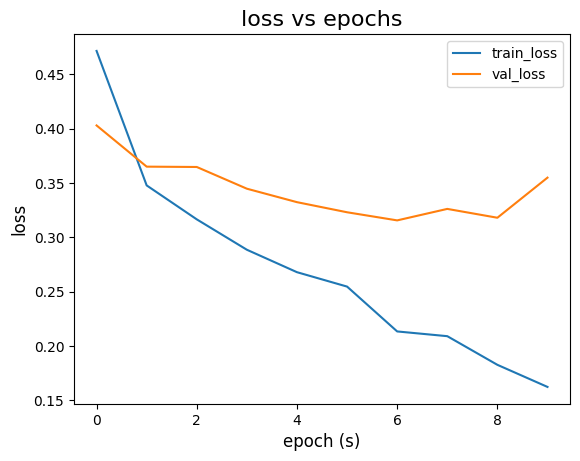

In [43]:
plotting(df=metrics_V3, temp_list=['loss', 'val_loss'])

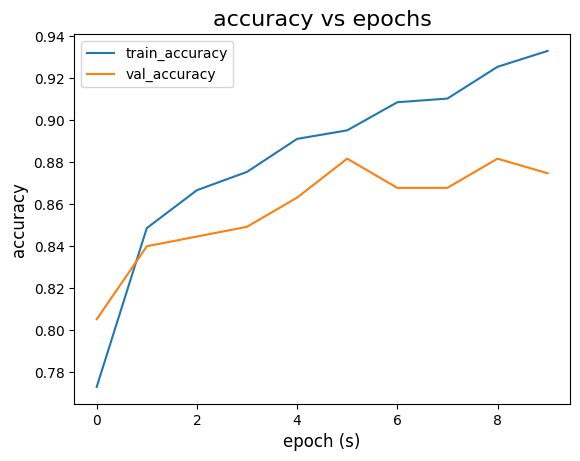

In [44]:
plotting(df=metrics_V3, temp_list=['accuracy', 'val_accuracy'])

### Summary

*   Loss and Accuracy on Validation seems to be improving after increased number of Epochs

*   However there are slight deteriorations during certain number of epoch

In [45]:
predictions_proba = model.predict(val)

14/14 [==============================] - 1s 40ms/step


In [46]:
predictions_proba.shape

(431, 1)

In [47]:
predictions_proba[:5]

array([[0.00160998],
       [0.97096735],
       [0.00413235],
       [0.9146768 ],
       [0.01446259]], dtype=float32)

In [48]:
predictions = predictions_proba > 0.5
predictions[:5]

array([[False],
       [ True],
       [False],
       [ True],
       [False]])

In [49]:
val.classes[:5]

array([0, 0, 0, 0, 0])

### Classification Report / Confusion Matrix

In [50]:
print(classification_report(y_true = val.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53       247
           1       0.41      0.46      0.43       184

    accuracy                           0.48       431
   macro avg       0.48      0.48      0.48       431
weighted avg       0.49      0.48      0.49       431



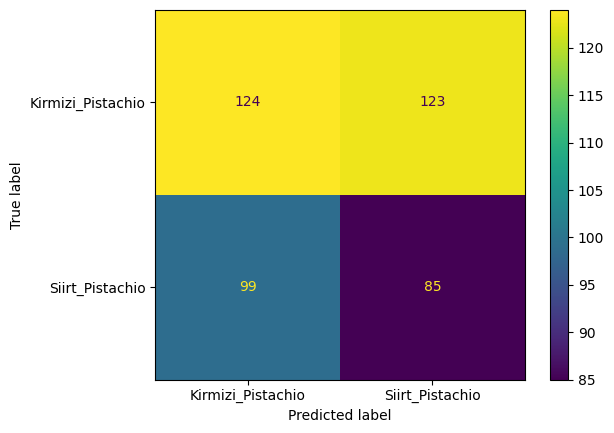

In [51]:
cm = confusion_matrix(y_true=val.classes, y_pred=predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train.class_indices.keys()).plot()
plt.show()

### ROC Curve / AUC

No Skill: 0.5
Model: 0.49306900193627884


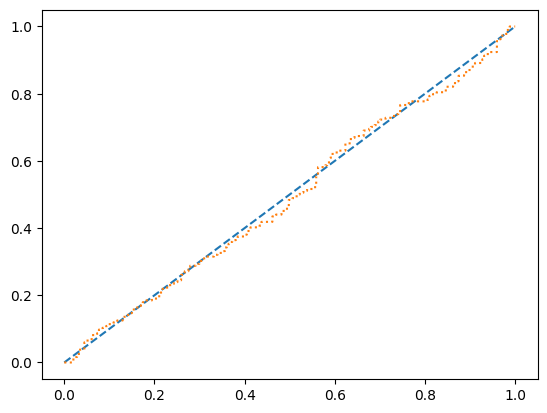

In [52]:
plot_roc(predictions_probability=predictions_proba, test=val.classes)

### Summary

*   The accuracy in this model have risen from Model V1 and V2

### Save model

In [53]:
model.save(filepath='./Data/Models/CNN_V3.keras')

## V4

In this model, I combine early stopping and dropout layer to observe the performance

In [54]:
model = Sequential()

# Convolutional Layer
model.add(layer=Conv2D(filters=32, kernel_size=(4,4), input_shape=(50,50,3), activation='relu'))
model.add(layer=MaxPool2D(pool_size=(2,2)))

model.add(layer=Flatten())
model.add(layer=Dense(units=256, activation='relu'))

# Adding in a dropout layer to prevent overfitting
model.add(Dropout(rate=0.5))

# Output layer
model.add(layer=Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [56]:
model.fit(x=train,
          epochs=10,
          validation_data=val,
          class_weight=class_weights,
          callbacks=[early_stop],
          )

Epoch 1/10


54/54 [==============================] - 5s 70ms/step - loss: 0.4423 - accuracy: 0.7921 - val_loss: 0.4652 - val_accuracy: 0.8144
Epoch 2/10
54/54 [==============================] - 4s 68ms/step - loss: 0.3488 - accuracy: 0.8439 - val_loss: 0.3615 - val_accuracy: 0.8353
Epoch 3/10
54/54 [==============================] - 4s 69ms/step - loss: 0.3124 - accuracy: 0.8567 - val_loss: 0.3560 - val_accuracy: 0.8492
Epoch 4/10
54/54 [==============================] - 4s 68ms/step - loss: 0.2836 - accuracy: 0.8754 - val_loss: 0.4284 - val_accuracy: 0.8028
Epoch 5/10
54/54 [==============================] - 4s 67ms/step - loss: 0.2824 - accuracy: 0.8794 - val_loss: 0.3337 - val_accuracy: 0.8701
Epoch 6/10
54/54 [==============================] - 4s 68ms/step - loss: 0.2599 - accuracy: 0.8858 - val_loss: 0.3194 - val_accuracy: 0.8840
Epoch 7/10
54/54 [==============================] - 4s 67ms/step - loss: 0.2305 - accuracy: 0.9056 - val_loss: 0.3301 - val_accuracy: 0.8747
Epoch 8/10
54/54 [======

### Model Evaluation

In [57]:
metrics_V4 = pd.DataFrame(model.history.history)
metrics_V4.to_csv('./Data/Models/CNN_metrics_V4.csv')
metrics_V4.head()

,loss,accuracy,val_loss,val_accuracy
0,0.442307,0.792079,0.465240,0.814385
1,0.348777,0.843914,0.361451,0.835267
2,0.312408,0.856727,0.356043,0.849188
3,0.283600,0.875364,0.428367,0.802784
4,0.282384,0.879441,0.333687,0.870070


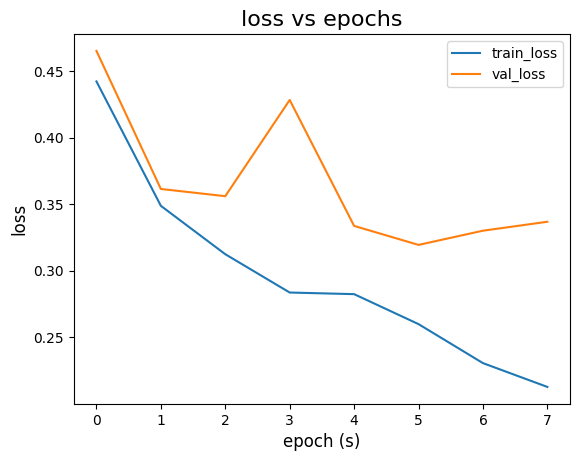

In [58]:
plotting(df=metrics_V4, temp_list=['loss', 'val_loss'])

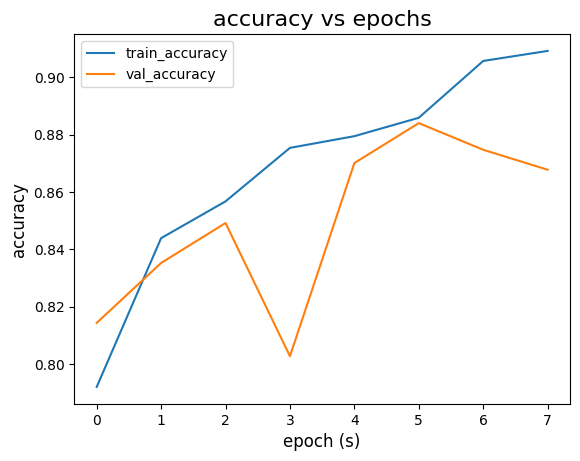

In [59]:
plotting(df=metrics_V4, temp_list=['accuracy', 'val_accuracy'])

### Summary

*   Loss and Accuracy on Validation seems to be improving after increased number of Epochs

*   However there are slight deteriorations during certain number of epoch



In [60]:
predictions_proba = model.predict(val)

14/14 [==============================] - 1s 39ms/step


In [61]:
predictions_proba.shape

(431, 1)

In [62]:
predictions_proba[:5]

array([[0.00855177],
       [0.19968672],
       [0.04089885],
       [0.91557544],
       [0.97429365]], dtype=float32)

In [63]:
predictions = predictions_proba > 0.5
predictions[:5]

array([[False],
       [False],
       [False],
       [ True],
       [ True]])

In [64]:
val.classes[:5]

array([0, 0, 0, 0, 0])

### Classification Report / Confusion Matrix

In [65]:
print(classification_report(y_true = val.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55       247
           1       0.45      0.52      0.48       184

    accuracy                           0.52       431
   macro avg       0.52      0.52      0.52       431
weighted avg       0.53      0.52      0.52       431



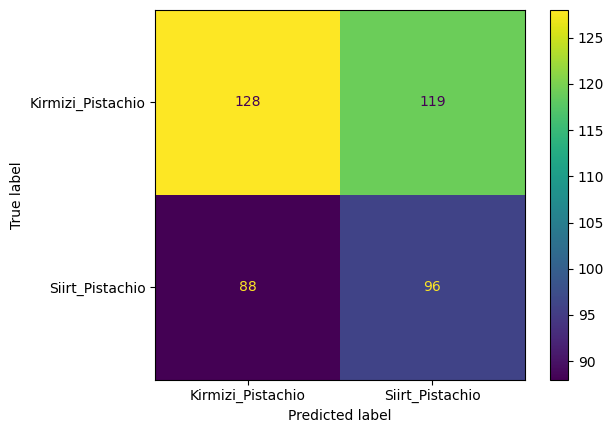

In [66]:
cm = confusion_matrix(y_true=val.classes, y_pred=predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train.class_indices.keys()).plot()
plt.show()

### ROC Curve / AUC

No Skill: 0.5
Model: 0.5174045062488999


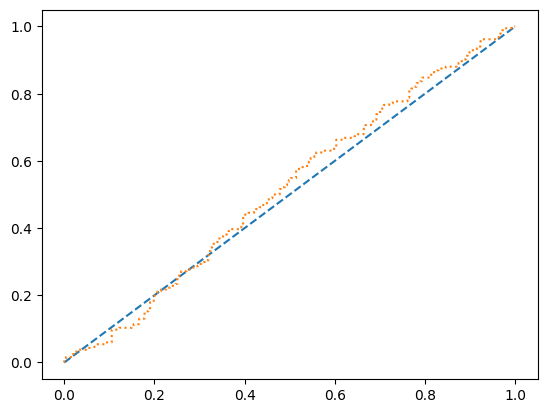

In [67]:
plot_roc(predictions_probability=predictions_proba, test=val.classes)

### Summary

*   A combination of early stopping and dropout layer shows a decrease in accuracy score from to 0.53.
*   Overall, Model V3 with the dropout layer and no early stopping offers the best accuracy
*   I will utilise parameters and hyperparameters of Model V3 in another notebook in an attempt to raise the accuracy score



### Save model

In [68]:
model.save(filepath='./Data/Models/CNN_V4.keras')

# Model Building - Part 2

*   I will attempt to improve the accuracy of the model from the previous high of 0.50
*   In the site below, I will utilise the techniques to obtain a higher accuracy


https://medium.com/mlearning-ai/7-best-techniques-to-improve-the-accuracy-of-cnn-w-o-overfitting-6db06467182f

## V5

In this model, I will introduce batch normalization in an attempt to raise the accuracy.

In [69]:
model = Sequential()

# Convolutional Layer
model.add(layer=Conv2D(filters=32, kernel_size=(4,4), input_shape=(50,50,3), activation='relu'))
model.add(layer=MaxPool2D(pool_size=(2,2)))

model.add(layer=Flatten())
model.add(layer=Dense(units=256, activation='relu'))

# Batch Normalization Layer
model.add(layer=BatchNormalization())

# Adding in a dropout layer to prevent overfitting
model.add(Dropout(rate=0.5))

# Output layer
model.add(layer=Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        1568      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 16928)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               4333824   
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 256)              

In [71]:
model.fit(x=train,
          epochs=10,
          validation_data=val,
          class_weight=class_weights,
          )

Epoch 1/10


54/54 [==============================] - 5s 70ms/step - loss: 0.4248 - accuracy: 0.8078 - val_loss: 3.2210 - val_accuracy: 0.4316
Epoch 2/10
54/54 [==============================] - 4s 67ms/step - loss: 0.3216 - accuracy: 0.8660 - val_loss: 0.3279 - val_accuracy: 0.8585
Epoch 3/10
54/54 [==============================] - 4s 68ms/step - loss: 0.2815 - accuracy: 0.8858 - val_loss: 1.5586 - val_accuracy: 0.5081
Epoch 4/10
54/54 [==============================] - 4s 66ms/step - loss: 0.2451 - accuracy: 0.9004 - val_loss: 0.4092 - val_accuracy: 0.8121
Epoch 5/10
54/54 [==============================] - 4s 66ms/step - loss: 0.2379 - accuracy: 0.9045 - val_loss: 0.8236 - val_accuracy: 0.6937
Epoch 6/10
54/54 [==============================] - 4s 65ms/step - loss: 0.1631 - accuracy: 0.9365 - val_loss: 2.3213 - val_accuracy: 0.5777
Epoch 7/10
54/54 [==============================] - 4s 67ms/step - loss: 0.1644 - accuracy: 0.9260 - val_loss: 0.2395 - val_accuracy: 0.9165
Epoch 8/10
54/54 [======

### Model Evaluation

In [72]:
metrics_V5 = pd.DataFrame(model.history.history)
metrics_V5.to_csv('./Data/Models/CNN_metrics_V5.csv')
metrics_V5.head()

,loss,accuracy,val_loss,val_accuracy
0,0.424831,0.807804,3.220995,0.431555
1,0.321555,0.866045,0.327869,0.858469
2,0.281513,0.885847,1.558576,0.508121
3,0.245122,0.900408,0.409196,0.812065
4,0.237922,0.904485,0.823579,0.693735


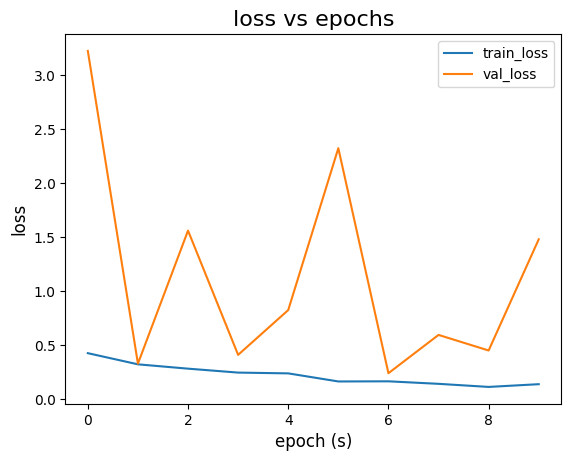

In [73]:
plotting(df=metrics_V5, temp_list=['loss', 'val_loss'])

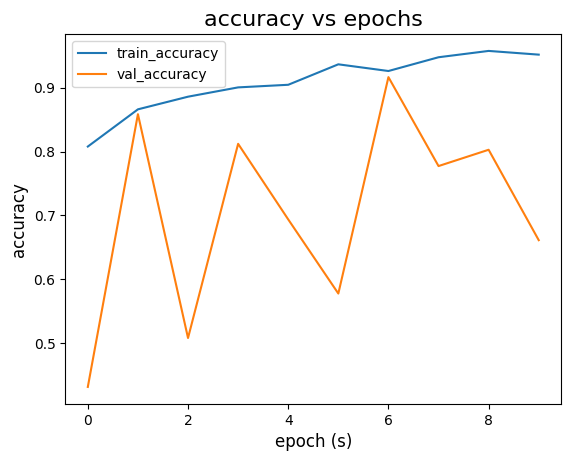

In [74]:
plotting(df=metrics_V5, temp_list=['accuracy', 'val_accuracy'])

### Summary

*   The loss and accuracy for validation depicts a heart rate monitor, ups and downs

*   Batch Normalization offers little if not nothing in terms of model improvement

In [75]:
predictions_proba = model.predict(val)

14/14 [==============================] - 1s 38ms/step


In [76]:
predictions_proba.shape

(431, 1)

In [77]:
predictions_proba[:5]

array([[0.9997727 ],
       [1.        ],
       [0.99999267],
       [0.4991733 ],
       [1.        ]], dtype=float32)

In [78]:
predictions = predictions_proba > 0.5
predictions[:5]

array([[ True],
       [ True],
       [ True],
       [False],
       [ True]])

In [79]:
val.classes[:5]

array([0, 0, 0, 0, 0])

### Classification Report / Confusion Matrix

In [80]:
print(classification_report(y_true = val.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.56      0.23      0.33       247
           1       0.42      0.76      0.54       184

    accuracy                           0.46       431
   macro avg       0.49      0.50      0.44       431
weighted avg       0.50      0.46      0.42       431



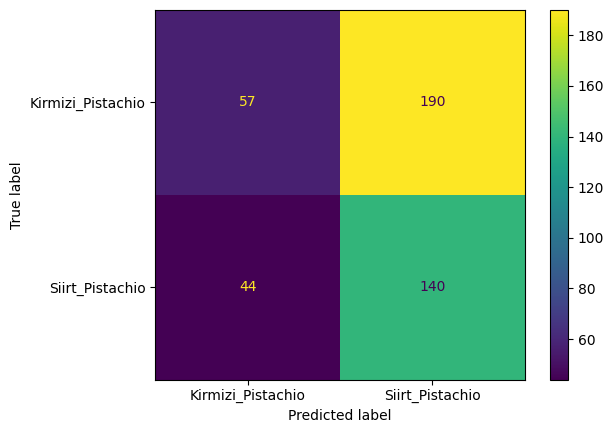

In [81]:
cm = confusion_matrix(y_true=val.classes, y_pred=predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train.class_indices.keys()).plot()
plt.show()

### ROC Curve / AUC

No Skill: 0.5
Model: 0.4839156838584756


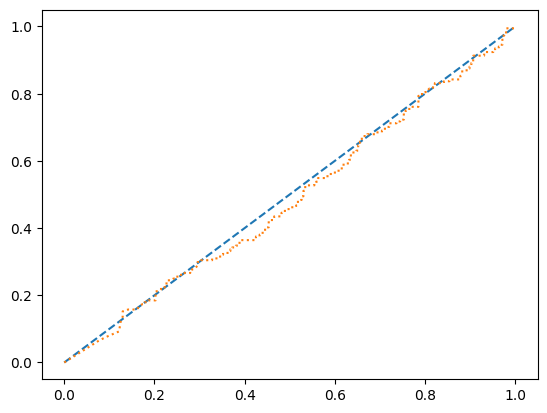

In [82]:
plot_roc(predictions_probability=predictions_proba, test=val.classes)

### Summary

*   From the above metrics, Batch Normalization causes the model to deteriorate

### Save model

In [83]:
model.save(filepath='./Data/Models/CNN_V5.keras')

## V6

In this model I will add a second convolutional layer in a bid to improve accuracy

In [84]:
model = Sequential()

# First Convolutional Layer
model.add(layer=Conv2D(filters=32, kernel_size=(4,4), input_shape=(50,50,3), activation='relu'))
model.add(layer=MaxPool2D(pool_size=(2,2)))

# Second Convolutional Layer
model.add(layer=Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
model.add(layer=MaxPool2D(pool_size=(2,2)))

model.add(layer=Flatten())
model.add(layer=Dense(units=256, activation='relu'))

# Adding in a dropout layer to prevent overfitting
model.add(Dropout(rate=0.5))

# Output layer
model.add(layer=Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 47, 47, 32)        1568      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 32)        4128      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3872)              0         
                                                                 
 dense_10 (Dense)            (None, 256)              

In [86]:
model.fit(x=train,
          epochs=10,
          validation_data=val,
          class_weight=class_weights,
          )

Epoch 1/10


54/54 [==============================] - 4s 59ms/step - loss: 0.4941 - accuracy: 0.7630 - val_loss: 0.4456 - val_accuracy: 0.7981
Epoch 2/10
54/54 [==============================] - 3s 58ms/step - loss: 0.3767 - accuracy: 0.8247 - val_loss: 0.3704 - val_accuracy: 0.8329
Epoch 3/10
54/54 [==============================] - 3s 57ms/step - loss: 0.3340 - accuracy: 0.8503 - val_loss: 0.3484 - val_accuracy: 0.8306
Epoch 4/10
54/54 [==============================] - 3s 56ms/step - loss: 0.3326 - accuracy: 0.8497 - val_loss: 0.3354 - val_accuracy: 0.8469
Epoch 5/10
54/54 [==============================] - 3s 57ms/step - loss: 0.3199 - accuracy: 0.8550 - val_loss: 0.3388 - val_accuracy: 0.8445
Epoch 6/10
54/54 [==============================] - 3s 57ms/step - loss: 0.2889 - accuracy: 0.8695 - val_loss: 0.3516 - val_accuracy: 0.8561
Epoch 7/10
54/54 [==============================] - 3s 58ms/step - loss: 0.2878 - accuracy: 0.8754 - val_loss: 0.3695 - val_accuracy: 0.8306
Epoch 8/10
54/54 [======

### Model Evaluation

In [87]:
metrics_V6 = pd.DataFrame(model.history.history)
metrics_V6.to_csv('./Data/Models/CNN_metrics_V6.csv')
metrics_V6.head()

,loss,accuracy,val_loss,val_accuracy
0,0.494074,0.762959,0.445630,0.798144
1,0.376686,0.824694,0.370430,0.832947
2,0.333951,0.850320,0.348431,0.830626
3,0.332574,0.849738,0.335362,0.846868
4,0.319880,0.854980,0.338808,0.844548


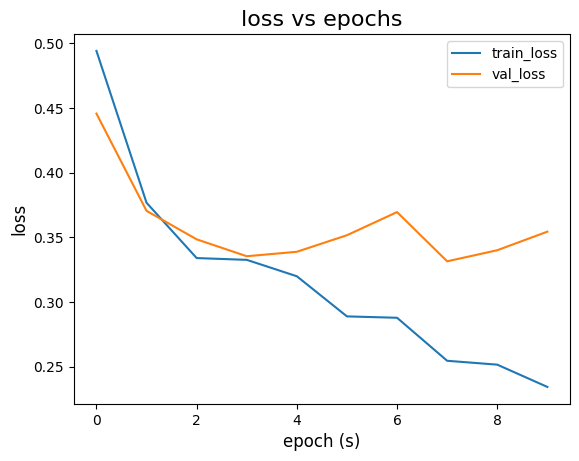

In [88]:
plotting(df=metrics_V6, temp_list=['loss', 'val_loss'])

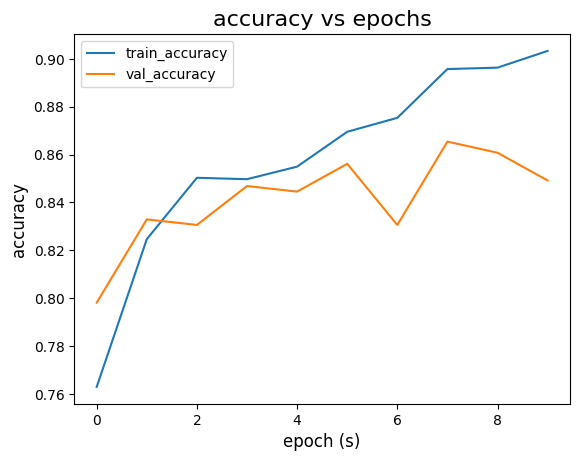

In [89]:
plotting(df=metrics_V6, temp_list=['accuracy', 'val_accuracy'])

### Summary

*   An additional dense layer causes accuracy on validation to rival that of train

*   However it offers no improvement on loss



In [90]:
predictions_proba = model.predict(val)

14/14 [==============================] - 1s 40ms/step


In [91]:
predictions_proba.shape

(431, 1)

In [92]:
predictions_proba[:5]

array([[2.9581462e-03],
       [3.6751989e-02],
       [6.0172920e-04],
       [9.3186158e-01],
       [9.3209237e-02]], dtype=float32)

In [93]:
predictions = predictions_proba > 0.5
predictions[:5]

array([[False],
       [False],
       [False],
       [ True],
       [False]])

In [94]:
val.classes[:5]

array([0, 0, 0, 0, 0])

### Classification Report / Confusion Matrix

In [95]:
print(classification_report(y_true = val.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56       247
           1       0.46      0.55      0.50       184

    accuracy                           0.53       431
   macro avg       0.54      0.54      0.53       431
weighted avg       0.55      0.53      0.54       431



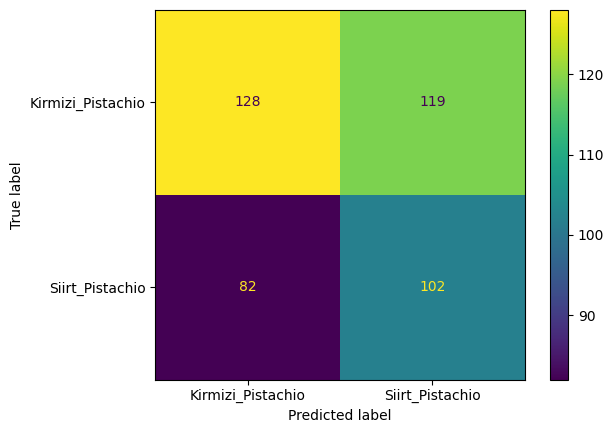

In [96]:
cm = confusion_matrix(y_true=val.classes, y_pred=predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train.class_indices.keys()).plot()
plt.show()

### ROC Curve / AUC

No Skill: 0.5
Model: 0.5564381270903009


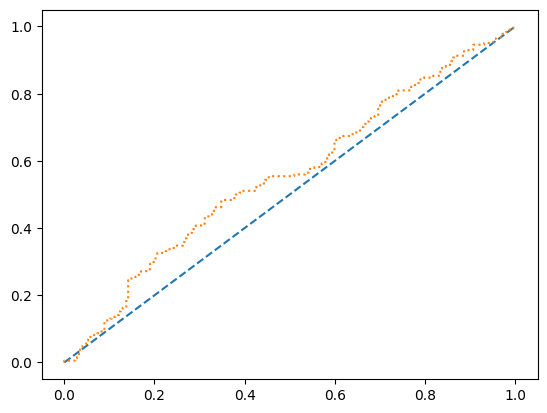

In [97]:
plot_roc(predictions_probability=predictions_proba, test=val.classes)

### Summary

*   The highest accuracy of all models belongs to Model V3

*   In the next notebook, I will do transfer learning and observe changes in accuracy


*   In addition, in the next notebook I will define a function to do everything, plot loss, plot accuracy, classification report, confusion matrix and ROC Curve / AUC





### Save model

In [98]:
model.save(filepath='./Data/Models/CNN_V6.keras')